In this notebook, we train CNN to classify image from CIFAR-10 datasets

In [94]:
'''
load datasets
'''
import keras
from keras.datasets import cifar10

#load pre-shuffled datasets
(XTrain, yTrain), (XTest, yTest) = cifar10.load_data()

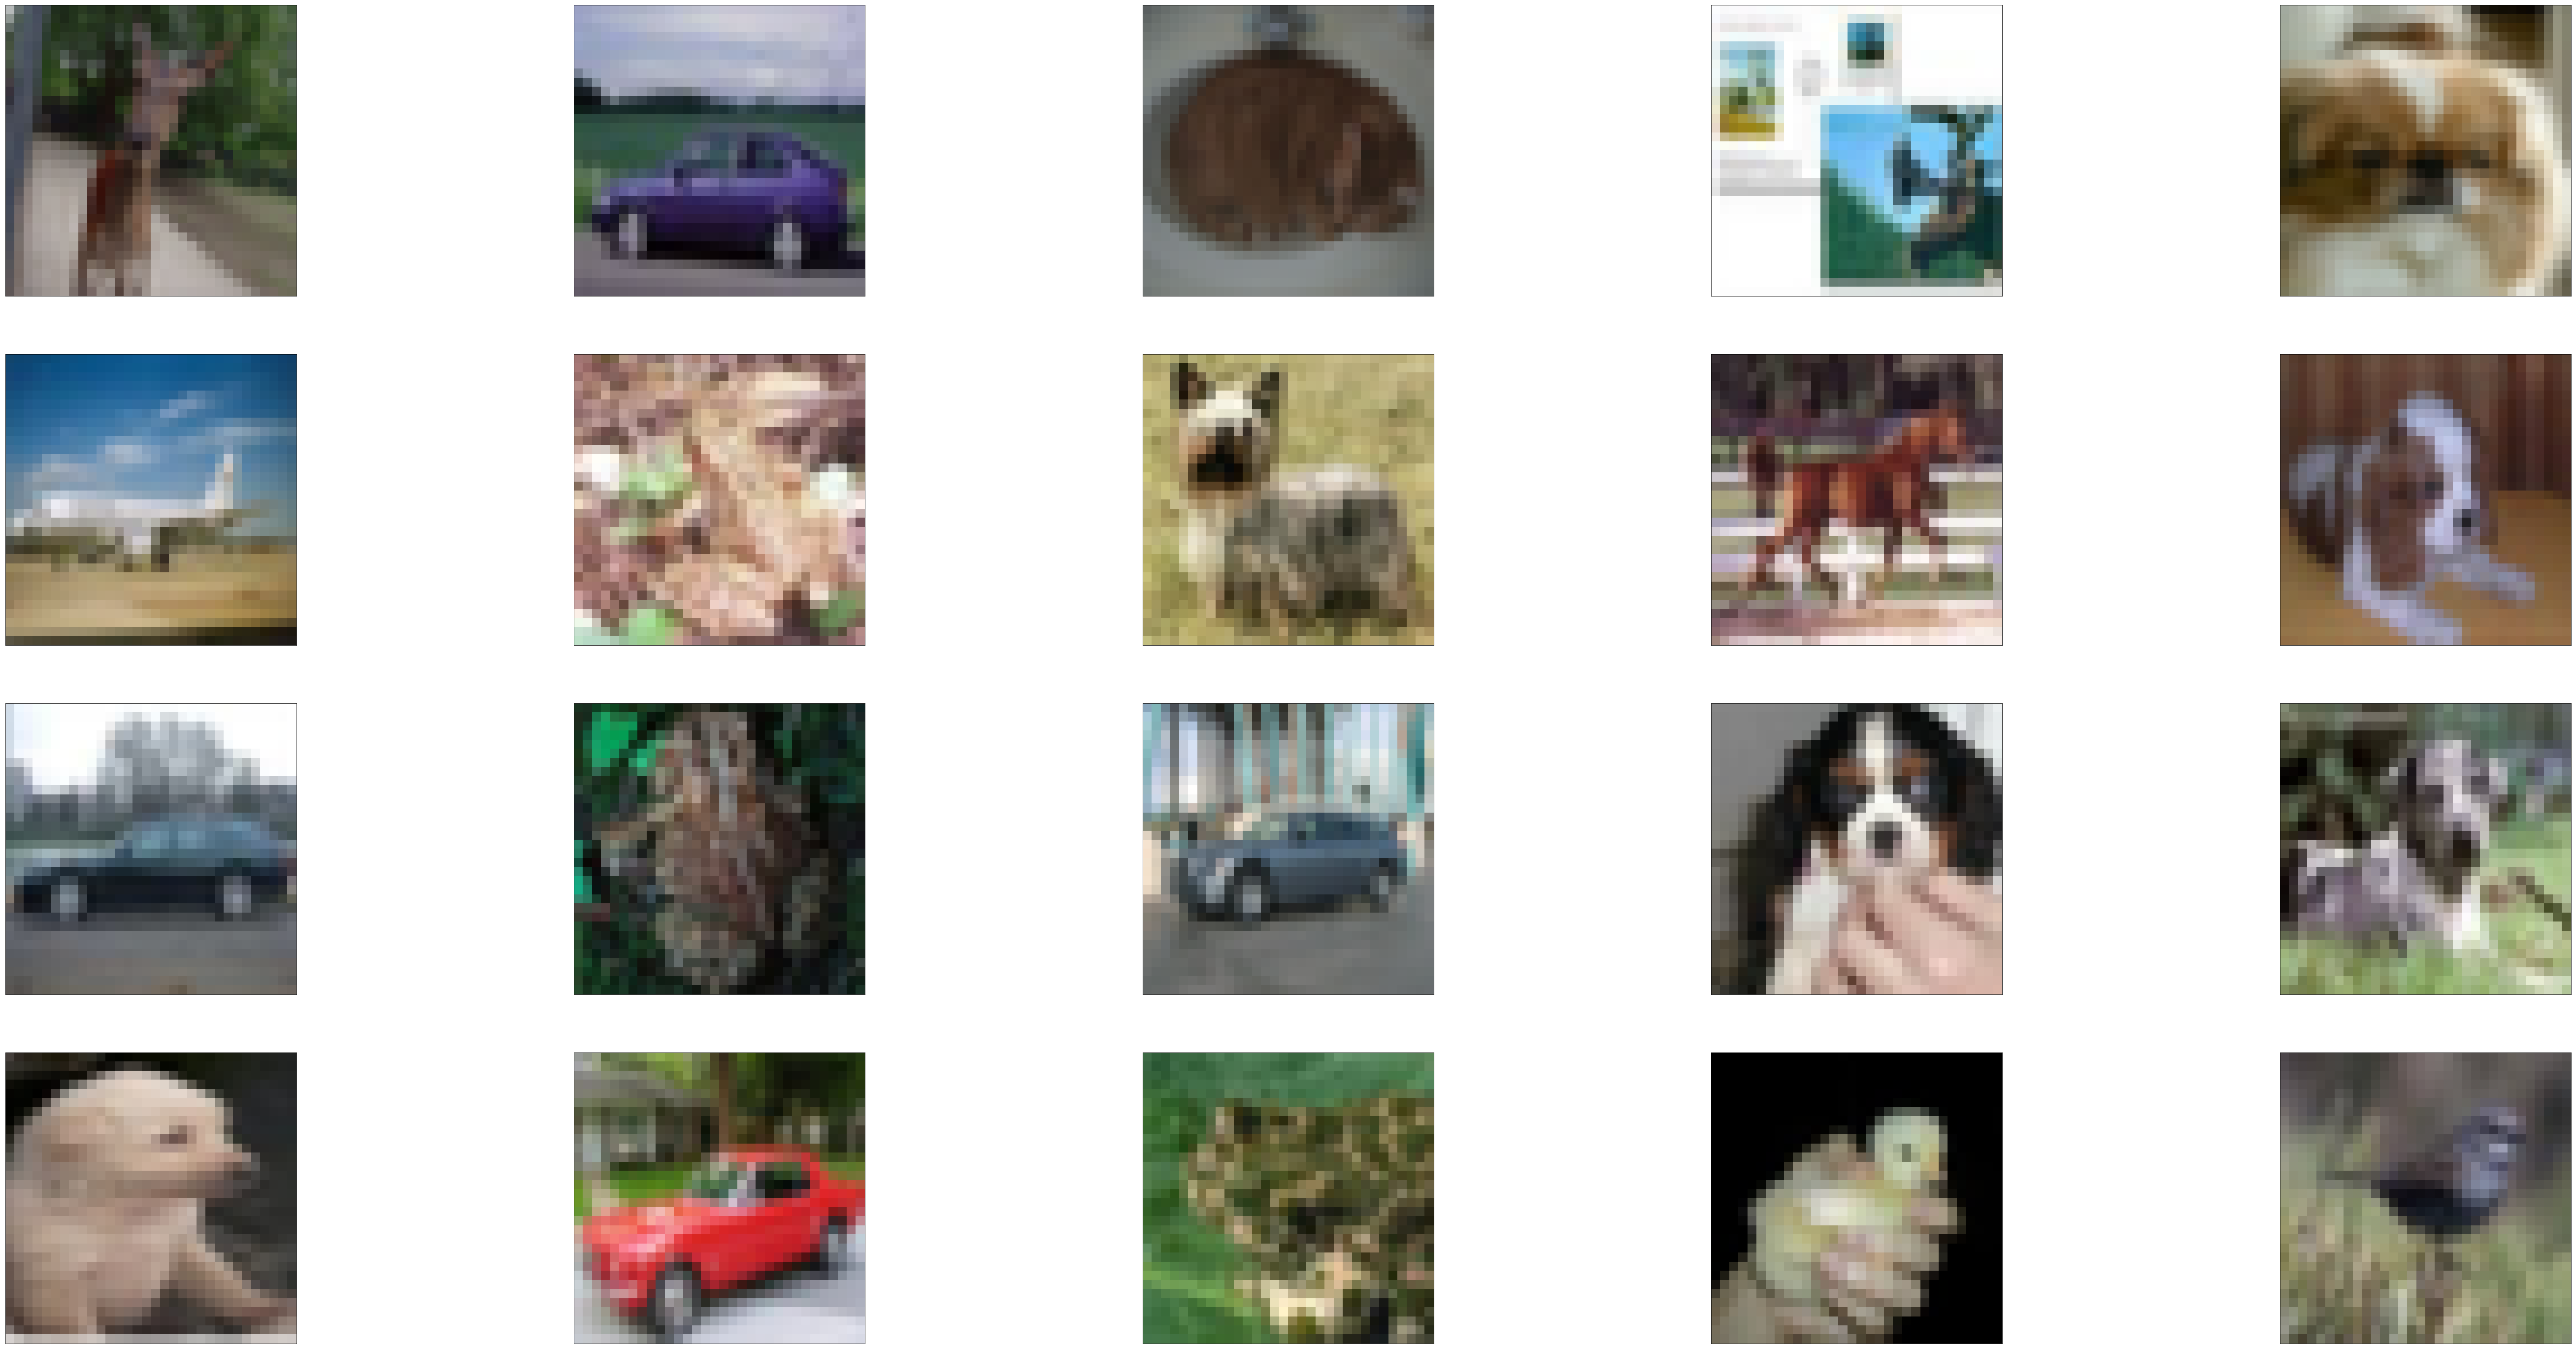

In [95]:
'''
visualize 5 random training images
'''
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

fig = plt.figure(figsize = (100, 50))
randomChoice = [random.randint(0, len(yTrain)) for i in range(20) ]
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(XTrain[randomChoice[i]]))

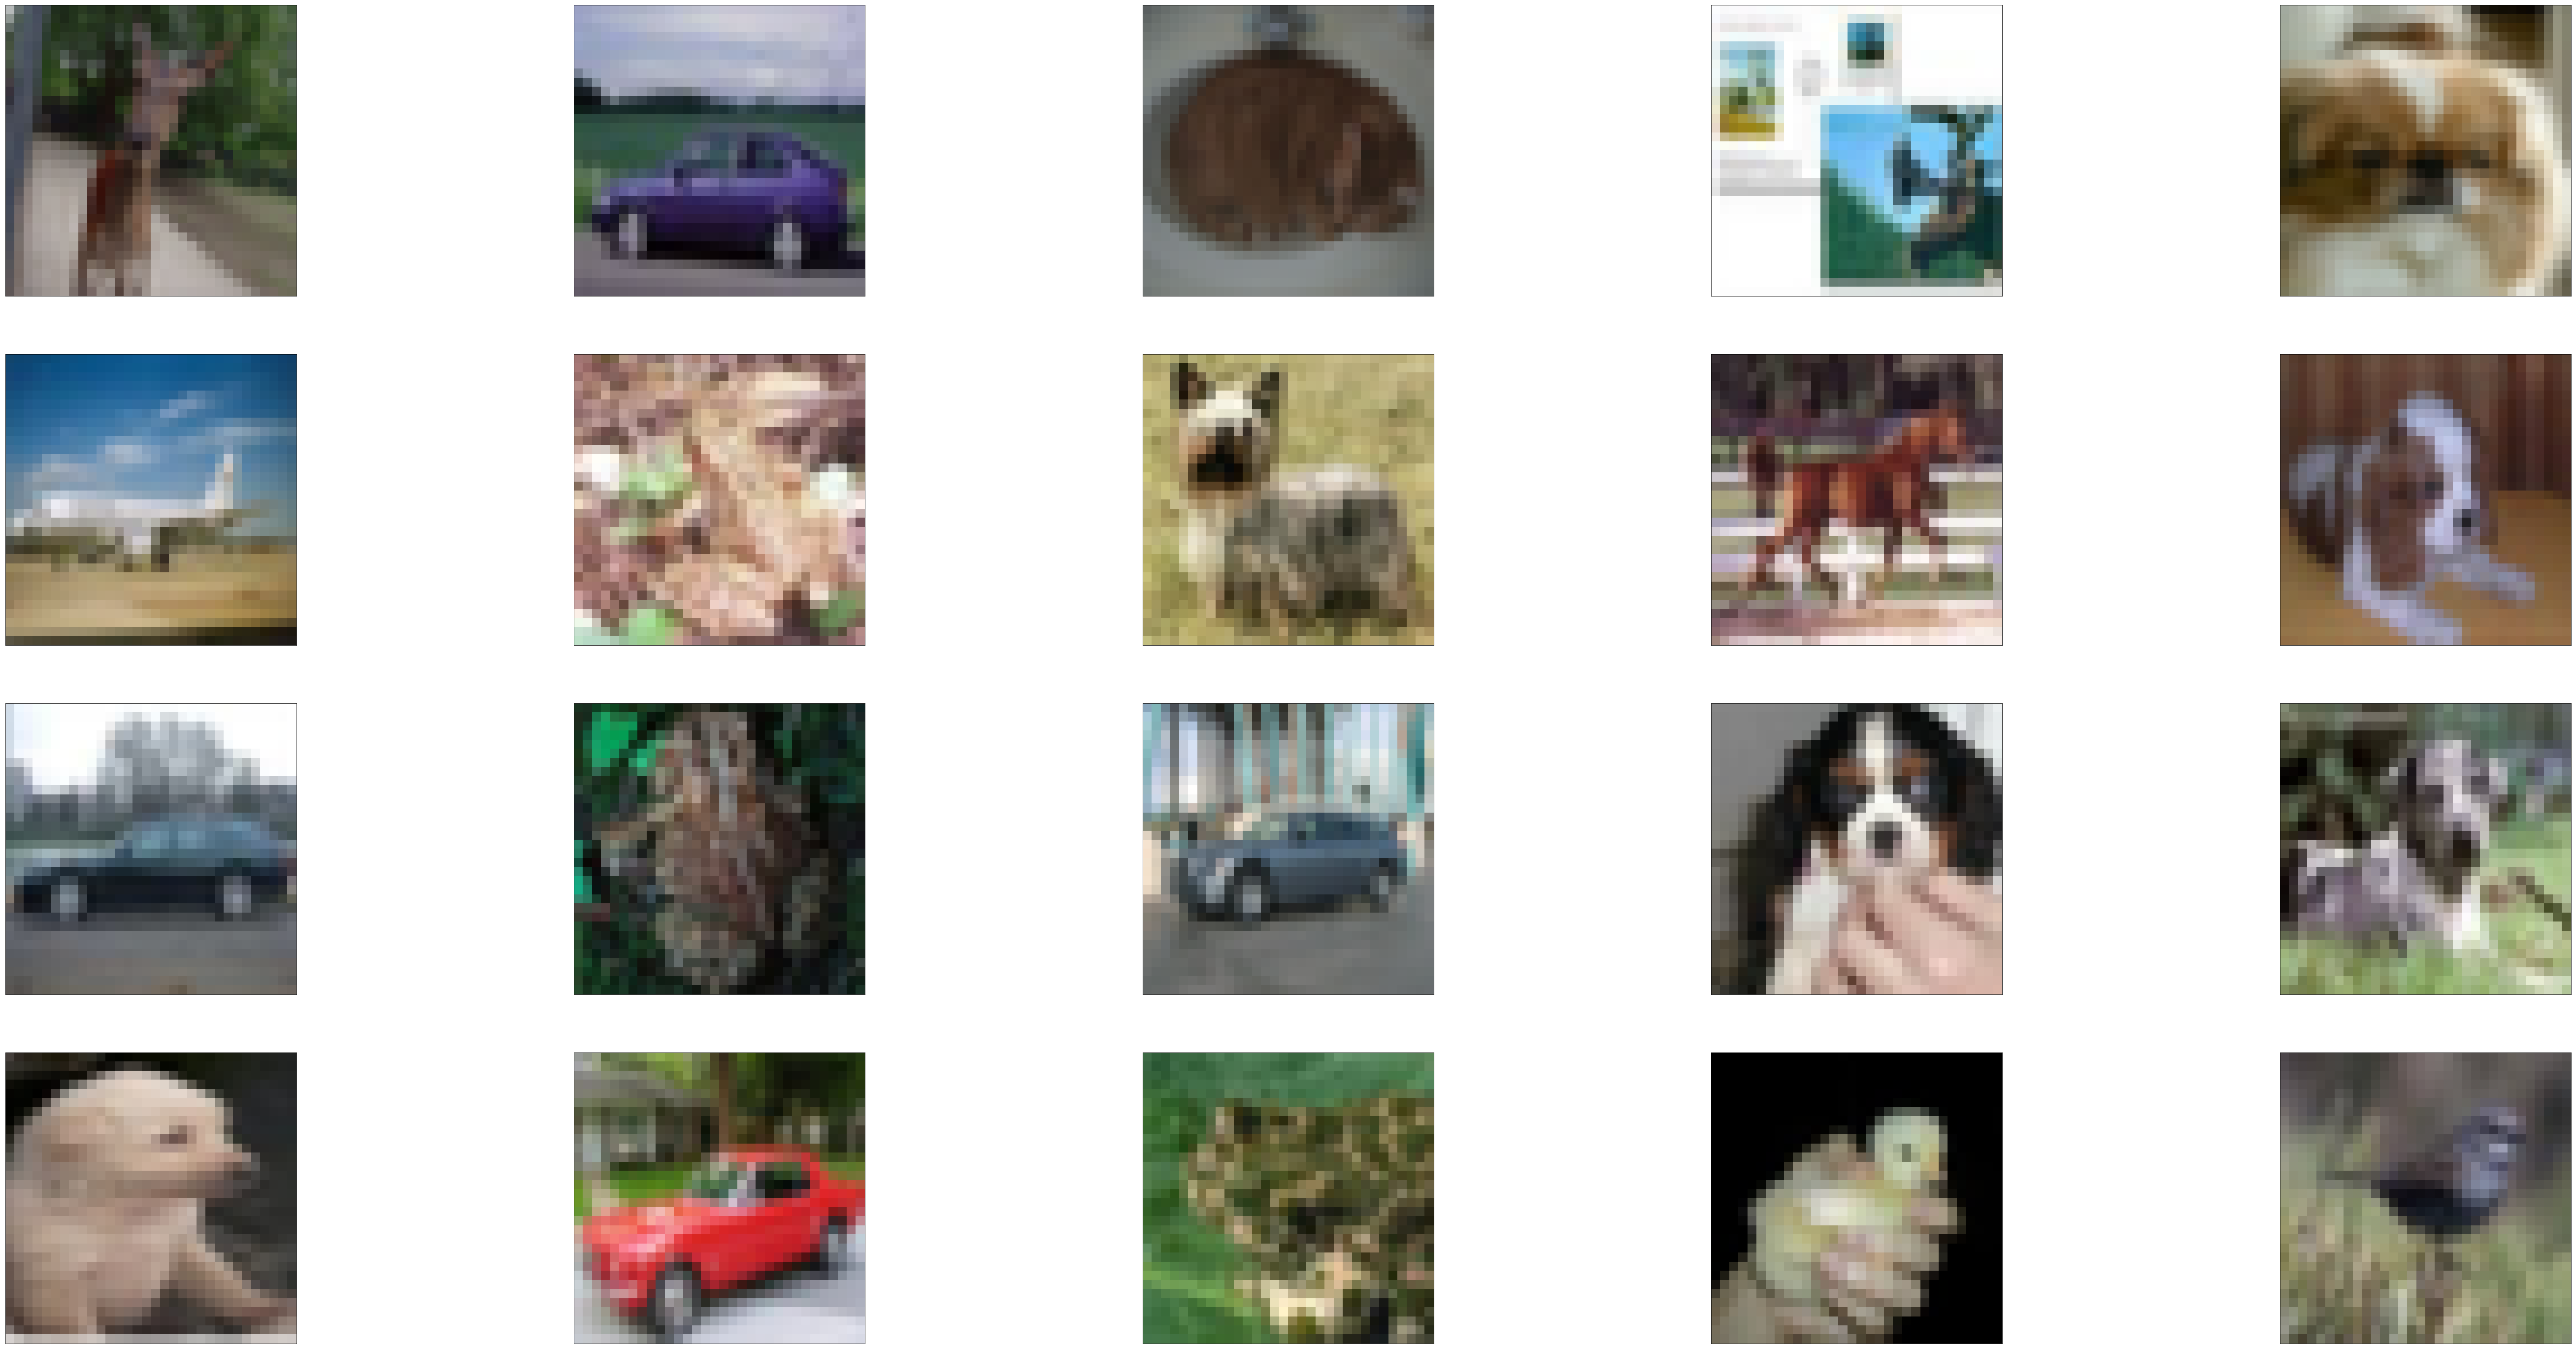

In [96]:
'''
rescale the images by dividing every pixel in every image with 255
normalization feature, even though there is no difference
'''
#rescale [0, 255] -> [0, 1] 
XTrain = XTrain.astype('float32') / 255
XTest  = XTest.astype('float32') / 255 

fig1 = plt.figure(figsize = (100, 50))
for i in range(20):
    axNew = fig1.add_subplot(4, 5, i + 1, xticks = [], yticks = [])
    axNew.imshow(np.squeeze(XTrain[randomChoice[i]]))

In [97]:
'''
break datasets into training, validation and testing sets
'''
from keras.utils import np_utils

#one hot encoding for the labels
numClasses = len(np.unique(yTrain)) #get unique labels value
yTrain     = keras.utils.to_categorical(yTrain, numClasses)
yTest      = keras.utils.to_categorical(yTest, numClasses)

#break training set[0 : 5000] into validation set[5000 : ]
(XTrain, XValid) = XTrain[5000 : ], XTrain[ : 5000]
(yTrain, yValid) = yTrain[5000 : ], yTrain[ : 5000]

#print dataset shape
print("XTrain shape      : {}".format(XTrain.shape))
print("Train samples     : {}".format(XTrain.shape[0]))
print("Validation samples: {}".format(XValid.shape[0]))
print("Test samples      : {}".format(XTest.shape[0]))

XTrain shape      : (45000, 32, 32, 3)
Train samples     : 45000
Validation samples: 5000
Test samples      : 10000


In [98]:
'''
DEFINE MODEL ARCHITECTURE (MOST IMPORTANT PART)
'''
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

#DEFINE THE ARCHITECTURE
##CONVOLUTIONAL LAYERS
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = XTrain.shape[1 : ])) #input layer
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

##FULLY CONNECTED LAYER
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(numClasses)) #output layer
model.add(Activation('softmax'))

#initialize RMSprop optimizer
networkOptimizer = keras.optimizers.rmsprop(lr = 0.0001, decay = 1e-6)

In [99]:
'''
TRAIN THE NETWORK
'''
model.compile(loss = 'categorical_crossentropy', optimizer = networkOptimizer, metrics = ['accuracy'])

In [100]:
'''
using real time data augmentation (optional)
'''
dataGenerator = ImageDataGenerator(
                featurewise_center            = False, #set input mean to 0 over the dataset
                samplewise_center             = False, #set each sample mean to 0
                featurewise_std_normalization = False, #divide inputs by std of the dataset
                samplewise_std_normalization  = False, #divied each input by its std
                zca_whitening                 = False, #apply ZCA whitening
                rotation_range                = 0,     #randomly rotate images
                width_shift_range             = 0.1,   #randomly shift images horizontally
                height_shift_range            = 0.1,   #randomly shit images vertically
                horizontal_flip               = True,  #randomly flip images
                vertical_flip                 = False) #randomly flip images
    
dataGenerator.fit(XTrain)
#re-train to fit generated data
batchSize = 32
model.fit_generator(dataGenerator.flow(XTrain, yTrain, batch_size = batchSize), 
                   epochs = 100, validation_data = (XValid, yValid), workers = 4)

Epoch 1/100
1407/1407 [==============================] - 492s 350ms/step - loss: 1.8251 - acc: 0.3363 - val_loss: 1.6629 - val_acc: 0.3982
Epoch 2/100
1407/1407 [==============================] - 470s 334ms/step - loss: 1.5127 - acc: 0.4532 - val_loss: 1.3068 - val_acc: 0.5356
Epoch 3/100
1407/1407 [==============================] - 411s 292ms/step - loss: 1.3951 - acc: 0.5010 - val_loss: 1.3214 - val_acc: 0.5154
Epoch 4/100
1407/1407 [==============================] - 430s 306ms/step - loss: 1.3066 - acc: 0.5344 - val_loss: 1.1146 - val_acc: 0.5970
Epoch 5/100
1407/1407 [==============================] - 573s 407ms/step - loss: 1.2350 - acc: 0.5605 - val_loss: 1.0771 - val_acc: 0.6088
Epoch 6/100
1407/1407 [==============================] - 489s 347ms/step - loss: 1.1700 - acc: 0.5849 - val_loss: 0.9986 - val_acc: 0.6426
Epoch 7/100
1407/1407 [==============================] - 500s 355ms/step - loss: 1.1175 - acc: 0.6041 - val_loss: 0.9509 - val_acc: 0.6686
Epoch 8/100
1407/1407 [====

1407/1407 [==============================] - 461s 327ms/step - loss: 0.6237 - acc: 0.7846 - val_loss: 0.5184 - val_acc: 0.8210
Epoch 60/100
1407/1407 [==============================] - 521s 370ms/step - loss: 0.6185 - acc: 0.7850 - val_loss: 0.5232 - val_acc: 0.8222
Epoch 61/100
1407/1407 [==============================] - 515s 366ms/step - loss: 0.6147 - acc: 0.7884 - val_loss: 0.5033 - val_acc: 0.8322
Epoch 62/100
1407/1407 [==============================] - 481s 342ms/step - loss: 0.6176 - acc: 0.7875 - val_loss: 0.5109 - val_acc: 0.8234
Epoch 63/100
1407/1407 [==============================] - 478s 340ms/step - loss: 0.6099 - acc: 0.7891 - val_loss: 0.4880 - val_acc: 0.8394
Epoch 64/100
1407/1407 [==============================] - 505s 359ms/step - loss: 0.6090 - acc: 0.7912 - val_loss: 0.5015 - val_acc: 0.8288
Epoch 65/100
1407/1407 [==============================] - 502s 357ms/step - loss: 0.6037 - acc: 0.7944 - val_loss: 0.4990 - val_acc: 0.8322
Epoch 66/100
1407/1407 [=========

In [101]:
'''
TEST THE NETWORK
'''
accuracy = model.evaluate(XTest, yTest, verbose = 1)
print("Test loss: {}".format(accuracy[0]))
print("Test accuracy: {}".format(accuracy[1]))

10000/10000 [==============================] - 33s 3ms/step
Test loss: 0.5408180153846741
Test accuracy: 0.8215


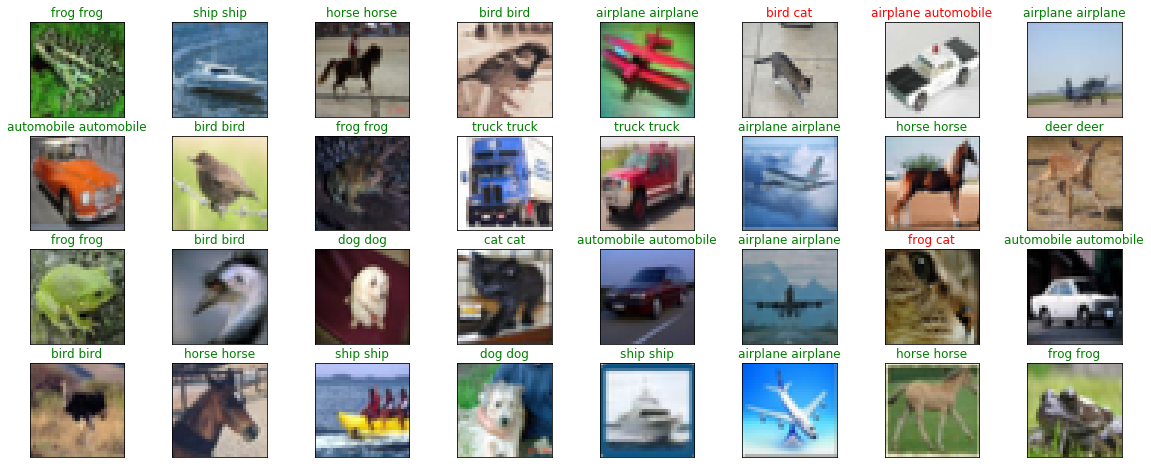

In [102]:
'''
visualize some predictions
'''
yHat = model.predict(XTest)
#define image labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#plot random test images, predicted labels, ground truth
fig2 = plt.figure(figsize = (20, 8))
for i, idx in enumerate(np.random.choice(XTest.shape[0], size = 32, replace = False)):
    axPrint  = fig2.add_subplot(4, 8, i + 1, xticks = [], yticks = [])
    axPrint.imshow(np.squeeze(XTest[idx]))
    predIdx  = np.argmax(yHat[idx])
    labelIdx = np.argmax(yTest[idx])
    axPrint.set_title("{} {}".format(labels[predIdx], labels[labelIdx]), 
                      color = ("green" if predIdx == labelIdx else "red"))